# EDA on SuperStore DataSet

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Data Sets\Random\SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


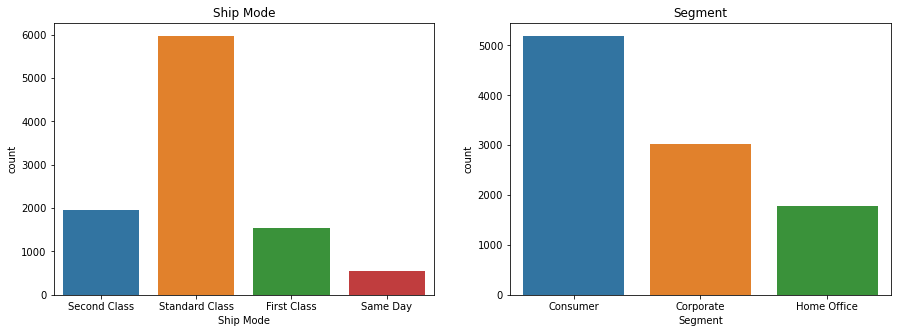

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(df['Ship Mode'])
plt.title("Ship Mode")

plt.subplot(122)
sns.countplot(df['Segment'])
plt.title("Segment")

plt.show()

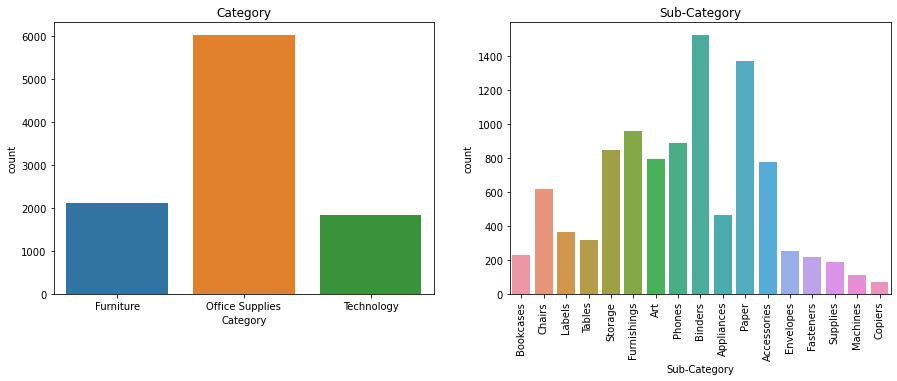

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(df['Category'])
plt.title("Category")

plt.subplot(122)
sns.countplot(df['Sub-Category'])
plt.title("Sub-Category")
plt.xticks(rotation=90)

plt.show()

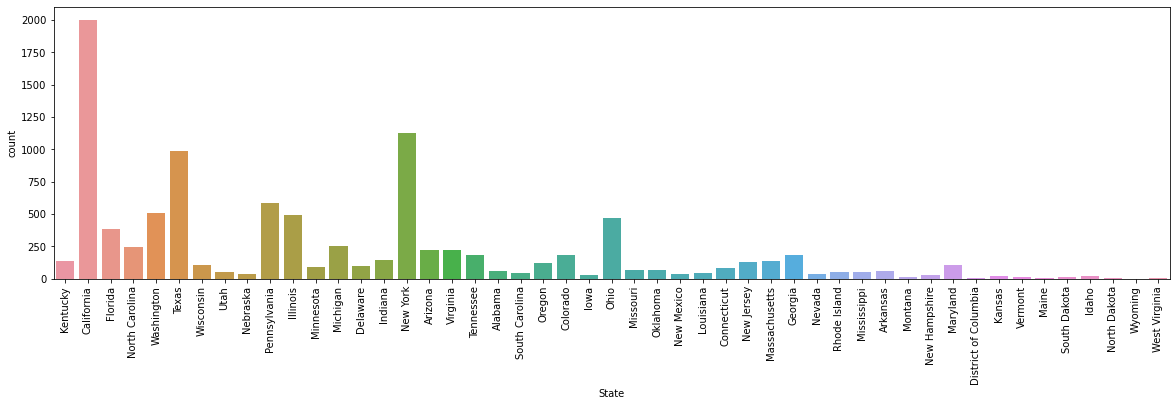

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.show()

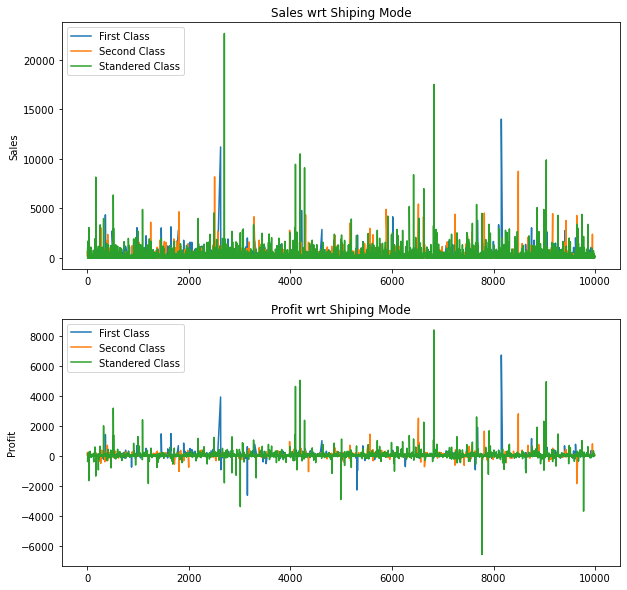

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(df[df['Ship Mode']=='First Class']['Sales'],label='First Class')
plt.plot(df[df['Ship Mode']=='Second Class']['Sales'],label='Second Class')
plt.plot(df[df['Ship Mode']=='Standard Class']['Sales'],label='Standered Class')
plt.title("Sales wrt Shiping Mode")
plt.ylabel('Sales')
plt.legend(loc="upper left")

plt.subplot(212)
plt.plot(df[df['Ship Mode']=='First Class']['Profit'],label='First Class')
plt.plot(df[df['Ship Mode']=='Second Class']['Profit'],label='Second Class')
plt.plot(df[df['Ship Mode']=='Standard Class']['Profit'],label='Standered Class')
plt.title("Profit wrt Shiping Mode")
plt.ylabel('Profit')
plt.legend(loc="upper left")
plt.show()

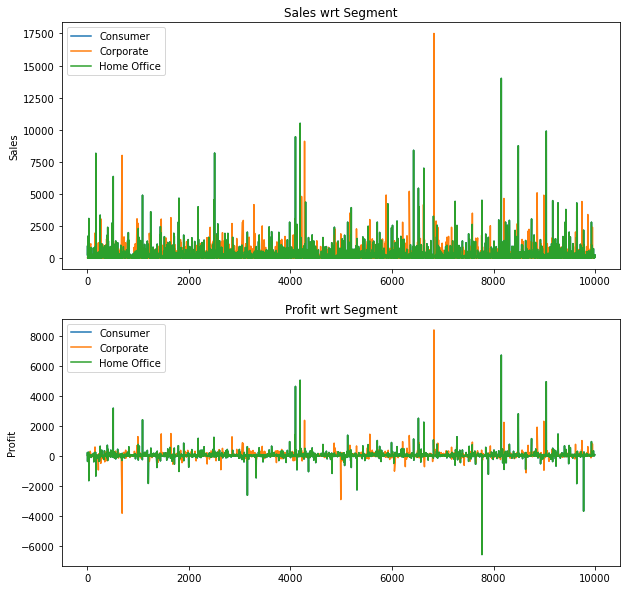

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(df[df['Segment']=='Consumer']['Sales'],label='Consumer')
plt.plot(df[df['Segment']=='Corporate']['Sales'],label='Corporate')
plt.plot(df[df['Segment']=='Consumer']['Sales'],label='Home Office')
plt.title("Sales wrt Segment")
plt.ylabel('Sales')
plt.legend(loc="upper left")

plt.subplot(212)
plt.plot(df[df['Segment']=='Consumer']['Profit'],label='Consumer')
plt.plot(df[df['Segment']=='Corporate']['Profit'],label='Corporate')
plt.plot(df[df['Segment']=='Consumer']['Profit'],label='Home Office')
plt.title("Profit wrt Segment")
plt.ylabel('Profit')
plt.legend(loc="upper left")
plt.show()



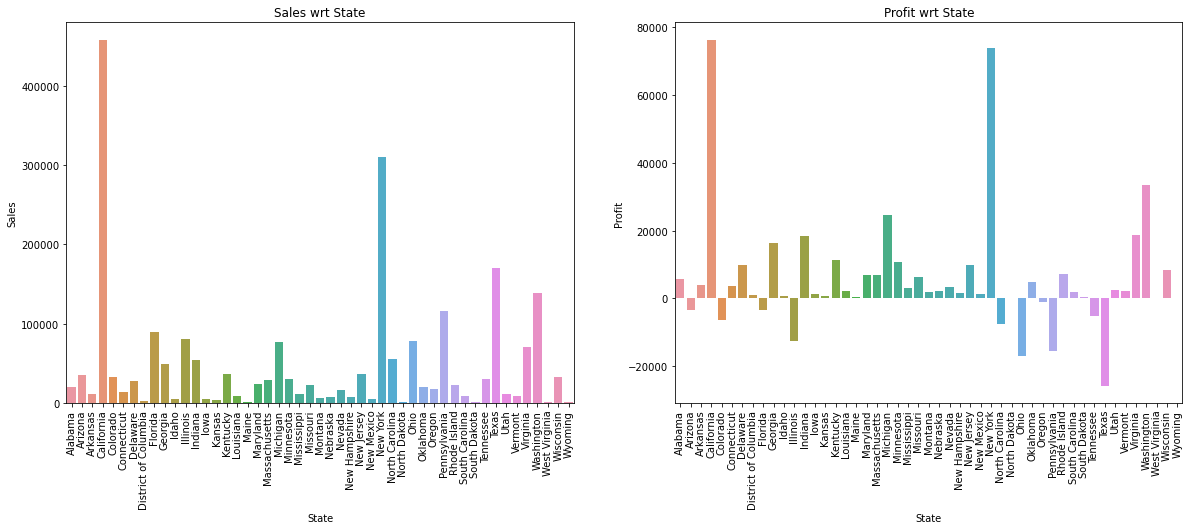

In [12]:
plt.figure(figsize=(20,7))
plt.subplot(121)
city_sale = pd.DataFrame(df.groupby(['State'])['Sales'].sum()).reset_index()
sns.barplot(city_sale['State'],city_sale['Sales'])
plt.title("Sales wrt State")
plt.xticks(rotation=90)

plt.subplot(122)
city_profit = pd.DataFrame(df.groupby(['State'])['Profit'].sum()).reset_index()
sns.barplot(city_profit['State'],city_profit['Profit'])
plt.title("Profit wrt State")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Discount on Different Category')

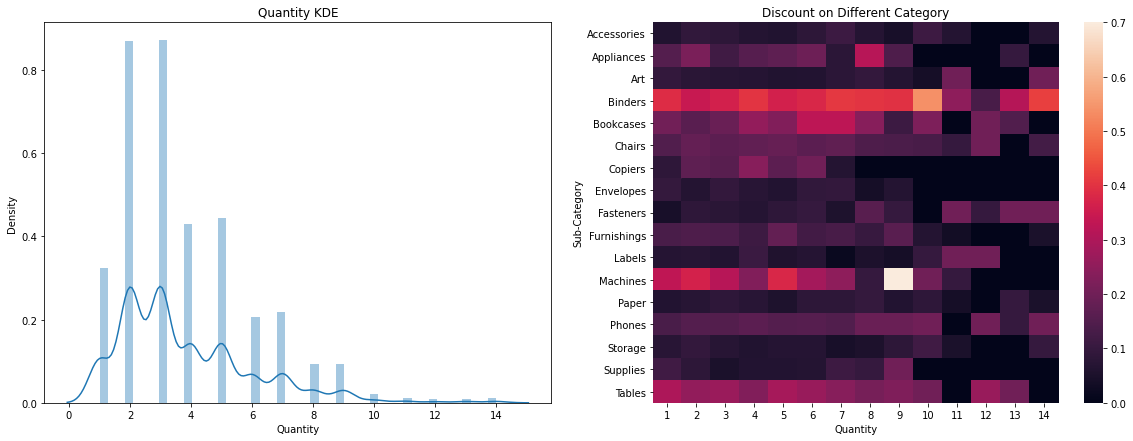

In [13]:
plt.figure(figsize=(20,7))

plt.subplot(121)
sns.distplot(df['Quantity'])
plt.title("Quantity KDE")

plt.subplot(122)
sns.heatmap(pd.pivot_table(df,index="Sub-Category",columns='Quantity',values='Discount').fillna(0))
plt.title("Discount on Different Category")

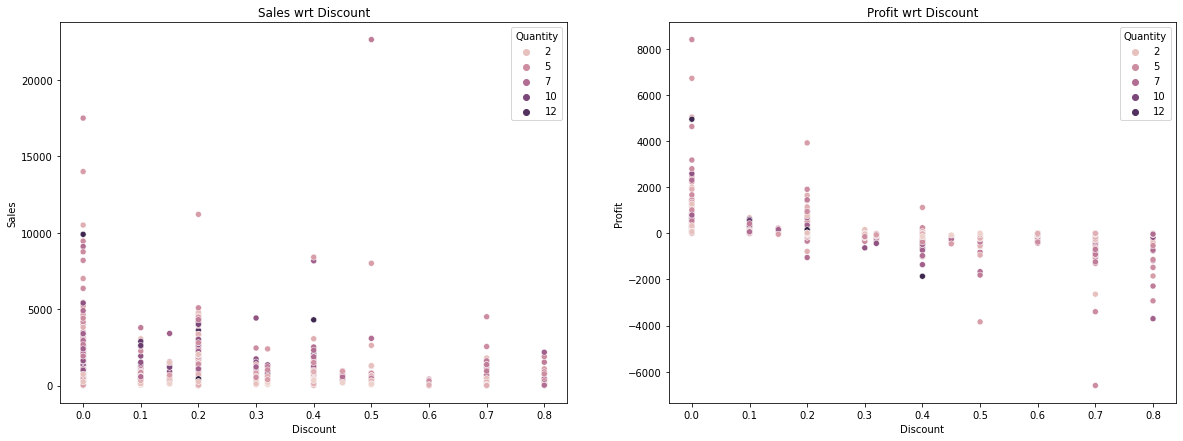

In [14]:
plt.figure(figsize=(20,7))

plt.subplot(121)
sns.scatterplot(df['Discount'],df['Sales'],hue=df['Quantity'])
plt.title("Sales wrt Discount")

plt.subplot(122)
sns.scatterplot(df['Discount'],df['Profit'],hue=df['Quantity'])
plt.title("Profit wrt Discount")

plt.show()

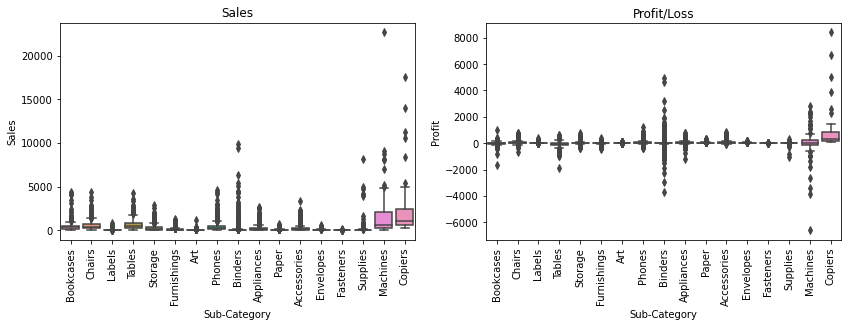

In [15]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.boxplot(df['Sub-Category'],df['Sales'])
plt.title("Sales")
plt.xticks(rotation=90)

plt.subplot(122)
sns.boxplot(df['Sub-Category'],df['Profit'])
plt.xticks(rotation=90)
plt.title("Profit/Loss")
plt.show()

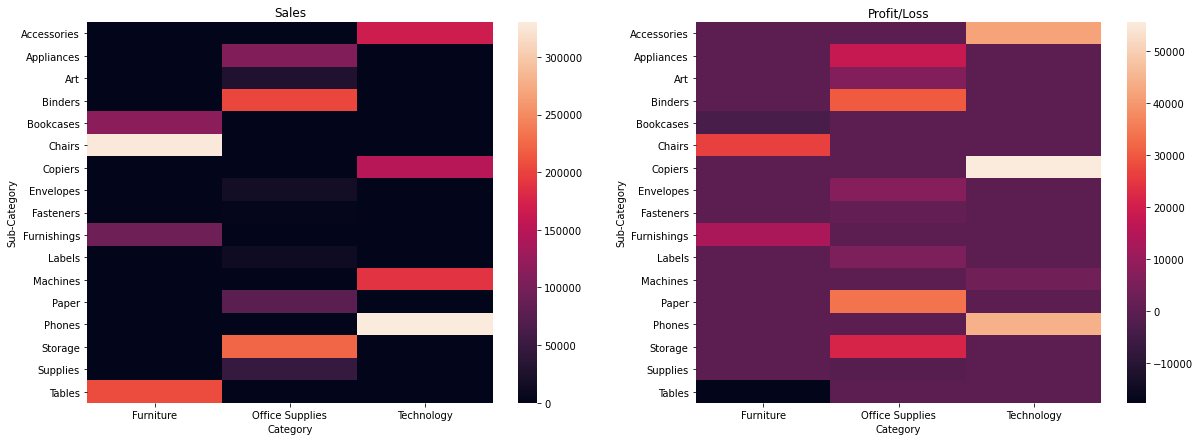

In [16]:
plt.figure(figsize=(20,7))

plt.subplot(121)
sns.heatmap(pd.pivot_table(df,index="Sub-Category",columns='Category',values='Sales',aggfunc='sum').fillna(0))
plt.title("Sales")

plt.subplot(122)
sns.heatmap(pd.pivot_table(df,index="Sub-Category",columns='Category',values='Profit',aggfunc='sum').fillna(0))
plt.title("Profit/Loss")

plt.show()

Text(0.5, 1.0, 'Sales vs Profit')

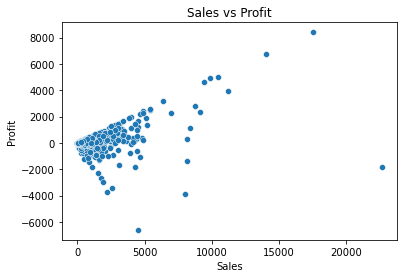

In [17]:
sns.scatterplot(df['Sales'],df['Profit'])
plt.title("Sales vs Profit")

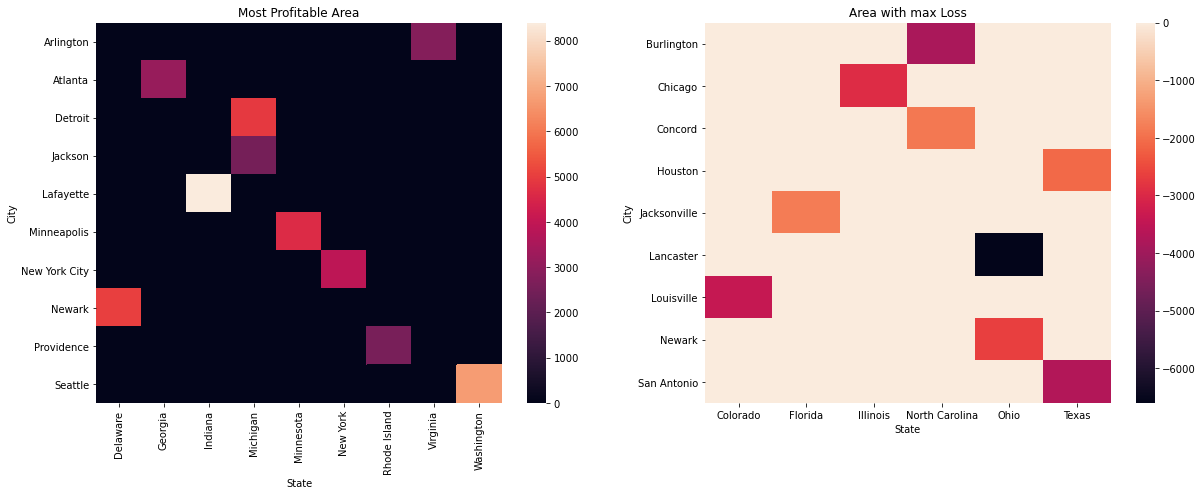

In [18]:
loss = df.sort_values('Profit').head(10)
profit = df.sort_values('Profit').tail(10)

plt.figure(figsize=(20,7))

plt.subplot(121)
sns.heatmap(pd.pivot_table(profit,index="City",columns='State',values='Profit').fillna(0))
plt.title('Most Profitable Area')

plt.subplot(122)
sns.heatmap(pd.pivot_table(loss,index="City",columns='State',values='Profit').fillna(0))
plt.title('Area with max Loss')

plt.show()

<AxesSubplot:xlabel='Region', ylabel='Profit'>

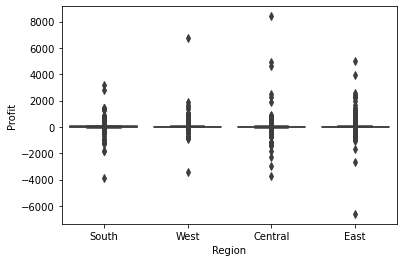

In [19]:
sns.boxplot(df['Region'],df['Profit'])

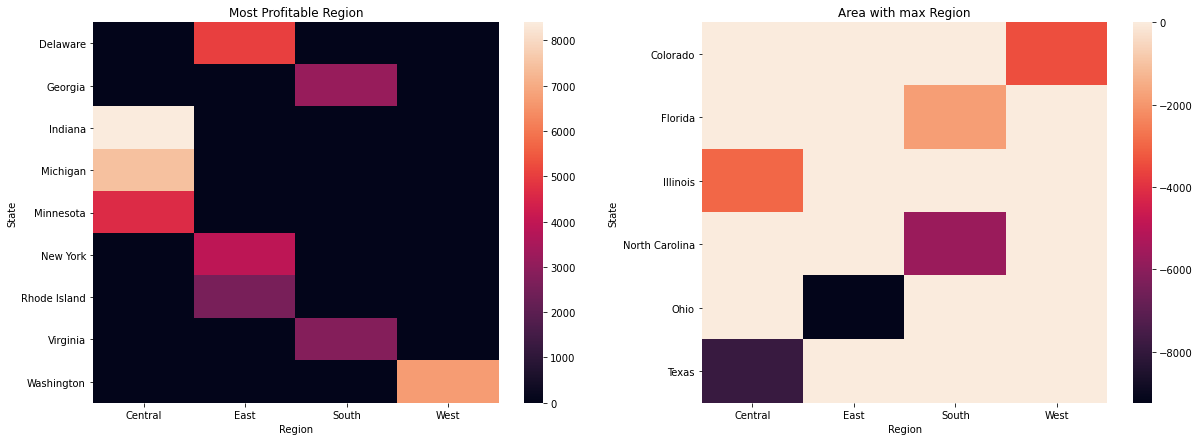

In [20]:
plt.figure(figsize=(20,7))

plt.subplot(121)
sns.heatmap(pd.pivot_table(profit,index="State",columns='Region',values='Profit',aggfunc='sum').fillna(0))
plt.title('Most Profitable Region')

plt.subplot(122)
sns.heatmap(pd.pivot_table(loss,index="State",columns='Region',values='Profit',aggfunc='sum').fillna(0))
plt.title('Area with max Region')

plt.show()

<AxesSubplot:xlabel='Region', ylabel='Profit'>

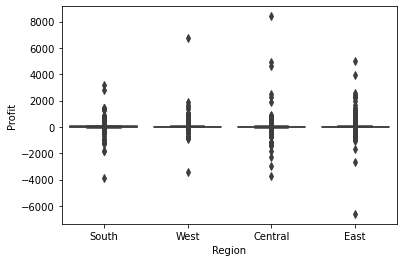

In [21]:
sns.boxplot(df['Region'],df['Profit'])

# Answer

- If we talk about region than East is weekest area of all the regions
- If we talk about state than Texas is weekest area of all the states
- If we talk about city than Lancaster(from Chio state) is weekest area of all the cities
- Tables from the forniture category is in max loss